<a href="https://colab.research.google.com/github/tejalsbhor/HACKATHON-/blob/main/Group_2_machine_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Goal: Build a model, taking into account genomic data from a potential patient, age, gender, and other relevant factors you find in research, to determine the risk a patient might have for breast cancer. You can be as specific or as broad in determining which type of breast cancer or which factors are involved in your model, although a more broad model will yield better results. 
#There are known genes whose sequences play a major role in breast cancer risk. Mutation in such genes can cause a greater risk for breast cancer development. One such gene is BRCA1 (sequence & genetic analysis found here). A solution could potentially include the ability to search a sequenced genome for a gene of interest, determine if the gene sequence is mutated, and use this information to determine risk.
#A solution could also include behavioral health risk factors, as found in the dataset linked below.
#Resources:
#BRFSS Study Data Set-A publicly available data set that combines participant answers to behavioral health questions with health & cancer screenings.
# BACA Code 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, roc_curve, auc

#upload brfss2020.csv on to google colab         
df = pd.read_csv('brfss2020.csv')
df_selected = df[['SEXVAR','_AGE65YR', 'GENHLTH', 'DRNKANY5','_SMOKER3','_TOTINDA']]
df_selected.isnull().sum()
df_selected = df_selected.dropna()

df_selected['SEXVAR'].value_counts()
df_selected = df_selected.rename(columns = {"SEXVAR": "Sex"})
sns.countplot(x = "Sex", data = df_selected)
#1 is male, 2 is female



FileNotFoundError: ignored

<Axes: xlabel='Over 65 Years Old', ylabel='count'>

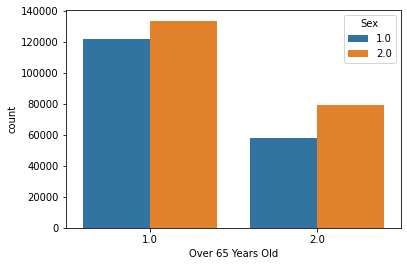

In [ ]:
df_selected['_AGE65YR'].value_counts()
df_selected.drop(df_selected[df_selected['_AGE65YR'] == 3].index, inplace = True)
df_selected = df_selected.rename(columns={"_AGE65YR":"Over 65 Years Old"})
sns.countplot(x='Over 65 Years Old', hue='Sex', data=df_selected)

#1 is under 65, 2 is 65+


<Axes: xlabel='General Health Status', ylabel='count'>

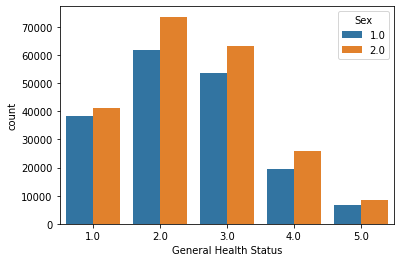

In [ ]:
df_selected['GENHLTH'].value_counts()
df_selected = df_selected[(df_selected['GENHLTH'] != 7) & (df_selected['GENHLTH'] != 9)]
df_selected = df_selected.rename(columns={"GENHLTH":"General Health Status"})
sns.countplot(x='General Health Status', hue='Sex', data=df_selected)

#1 means very good general health, 2 means very good, 3 means good, 4 means fair, 5 means poor

<Axes: xlabel='Physical Activity Status', ylabel='count'>

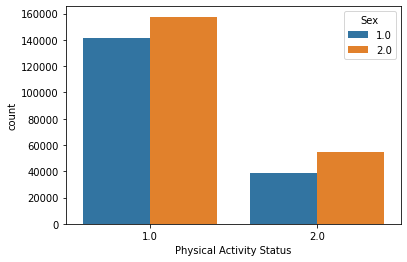

In [ ]:
df_selected['_TOTINDA'].value_counts()
df_selected.drop(df_selected[df_selected['_TOTINDA'] == 9].index, inplace = True)
df_selected = df_selected.rename(columns={"_TOTINDA":"Physical Activity Status"})
sns.countplot(x='Physical Activity Status', hue='Sex', data=df_selected)
#1 means they have done exercise in the last 30 days, 2 means they have not

<Axes: xlabel='Tobacco Usage', ylabel='count'>

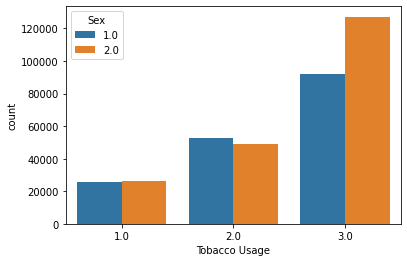

In [ ]:
df_selected['_SMOKER3'].value_counts()
df_selected.drop(df_selected[df_selected['_SMOKER3'] == 9].index, inplace = True)
chg = {2 : 1, 3 : 2, 4 : 3}
df_selected['_SMOKER3'].replace(to_replace=chg, inplace=True)
df_selected = df_selected.rename(columns={"_SMOKER3" : "Tobacco Usage"})
sns.countplot(x='Tobacco Usage', hue='Sex', data=df_selected)
#1 means every day smoker, 2 means someday smoker, 3 means former smoker

<Axes: xlabel='Alcohol Usage', ylabel='count'>

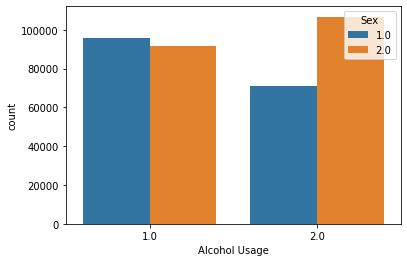

In [ ]:
df_selected['DRNKANY5'].value_counts()
df_selected = df_selected[(df_selected['DRNKANY5'] != 7) & (df_selected['DRNKANY5'] != 9)]
df_selected = df_selected.rename(columns={"DRNKANY5":"Alcohol Usage"})
sns.countplot(x='Alcohol Usage', hue='Sex', data=df_selected)
#1 means they had a drink in the last 30 days

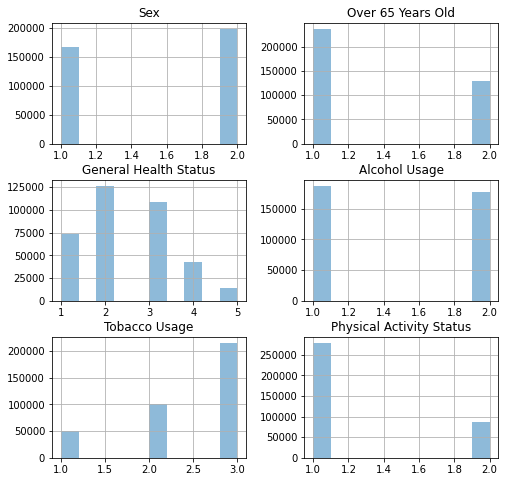

In [ ]:
df_selected.hist(alpha=0.5, figsize=(8,8))
plt.show()

In [ ]:
#df_sampled = df_selected.sample(frac = 0.1, random_state = 42)
#X = df_sampled.drop(columns = ['Physical Activity Status'])
#Y = df_sampled['Physical Activity Status']
#scaled_X = MinMaxScaler(feature_range=(0,1)). fit_transform(X)
#X = pd.DataFrame(scaled_X, columns = X.columns)
#X.head()
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)


In [ ]:
#import warnings
#warnings.filterwarnings('ignore')
#param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],'penalty': ['l1', 'l2'],'C' : np.logspace(-4, 4, 20)}

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

#lr_rscv = RandomizedSearchCV(
    #LogisticRegression(),
    #param_grid,
    #n_iter = 50,
    #verbose = True, 
    #cv = cv, 
    #n_jobs = -1,
    #scoring = 'accuracy',
    #return_train_score = True)

#lr_rscv.fit(X, Y)

Fitting 15 folds for each of 50 candidates, totalling 750 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
                   estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
#best_param = lr_rscv.best_params_
#print(best_param)
#lr_rscv.best_score_

0.773311427528295

In [ ]:
#lr = LogisticRegression(solver = best_param['solver'], penalty = best_param['penalty'], C = best_param['C'] )
#lr.fit(X_train, Y_train)
#Y_pred = lr.predict(X_test)

Accuracy of model: 0.7745527564804673



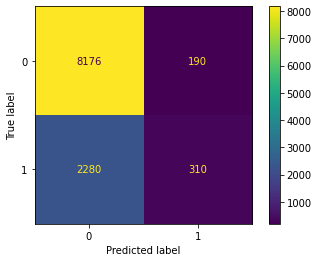

In [ ]:
#accuracy = accuracy_score(Y_test.values, Y_pred)
#print(f"Accuracy of model: {accuracy}\n")
#knn_cm = confusion_matrix(Y_test, Y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm)
#disp.plot()
#plot demonstrates that if person falls in to true positive categoy they have more of a risk of breast cancer
